# Aula 03

* pacote os
* datetime
* pacote scipy



## README
Crie uma pasta de dados no diretório 2024, caso você clone este repositório. Alternativamente, você pode criar uma pasta no mesmo diretório deste jupyter notebook com nome de dados

## Utilizando o pacote OS
Baixando os dados de https://hoinaski.prof.ufsc.br/BRAIN/getMETAR


In [68]:
# Importanto pacote os
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Extraindo o diretório que estamos trabalhando
cwd = os.getcwd()

print('Diretório atual: ' + cwd)


# Estabelecendo a pasta de dados que quero utilizar
dataPath = os.path.dirname(cwd) +'\\dados'

print('Diretório de dados:' + dataPath)

Diretório atual: C:\Users\Leonardo.Hoinaski\Documents\ENS410064\2024\notebooks
Diretório de dados:C:\Users\Leonardo.Hoinaski\Documents\ENS410064\2024\dados


In [52]:
# Listar documentos que estão dentro da pasta de dados
# Extraindo o nome dos arquivos dentro da pasta
dataList = os.listdir(dataPath)

print(dataList)

dataList[0]

['Deg2UTM.csv', 'metar_FORT_2023.csv', 'metar_SBFL_2022.csv', 'metar_SBFL_2023.csv', 'metar_SBFL_2024.csv', 'Nova pasta', 'UPPERAIR(1).UA']


'Deg2UTM.csv'

In [60]:
# Listando arquivos com o nome iniciando em metar
prefixed = [filename for filename in os.listdir(dataPath) if filename.startswith("metar")]

dataList = prefixed

print(prefixed)

['metar_FORT_2023.csv', 'metar_SBFL_2022.csv', 'metar_SBFL_2023.csv', 'metar_SBFL_2024.csv']


In [59]:
# Extraindo os anos dos dados
# Trabalhando com o nome dos arquivos
years = []
for dl in dataList:
    if os.path.isfile(dataPath+'\\'+dl):
        years.append(dl.split('_')[-1].split('.')[0])
    else:
        print('Não é um arquivo')

years = np.unique(years)
print(years)


# Extraindo as estações de dados
stations = []
for dl in dataList:
    if os.path.isfile(dataPath+'\\'+dl):
        stations.append(dl.split('_')[-2])
    else:
        print('Não é um arquivo')

stations = np.unique(stations)
print(stations)


['2022' '2023' '2024']
['FORT' 'SBFL']


In [31]:
# lendo todos os arquivos da pasta
# Todos os dados devem estar no mesmo formato, com as mesmas colunas
dataAll=[]
for dl in dataList:
    print(dl)
    data = pd.read_csv(dataPath+'\\'+dl)
    dataAll.append(data)

# Concatenando a lista de dados
dataAll = pd.concat(dataAll)
dataAll.head()

metar_FOR_2023.csv
metar_SBFL_2022.csv
metar_SBFL_2023.csv
metar_SBFL_2024.csv


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh
0,1,1,2023,0,NaN,90.0,3.601108,NaN,NaN,NaN,1009.662022,28.0,23.0,NaN,0.0,74.28
1,1,1,2023,1,NaN,100.0,4.629996,640.08,3.0,3.0,1009.662022,28.0,24.0,NaN,0.0,78.90
2,1,1,2023,2,NaN,100.0,4.629996,670.56,3.0,3.0,1009.665616,27.0,24.0,NaN,0.0,83.66
3,1,1,2023,3,NaN,100.0,4.629996,670.56,3.0,3.0,1009.665616,27.0,23.0,NaN,0.0,78.76
4,1,1,2023,4,NaN,110.0,4.629996,670.56,3.0,3.0,1009.669209,27.0,23.0,NaN,0.0,78.76


FORT
2022
Não tem a estação ou o ano
2023
2024
Não tem a estação ou o ano
SBFL
2022
2023
2024


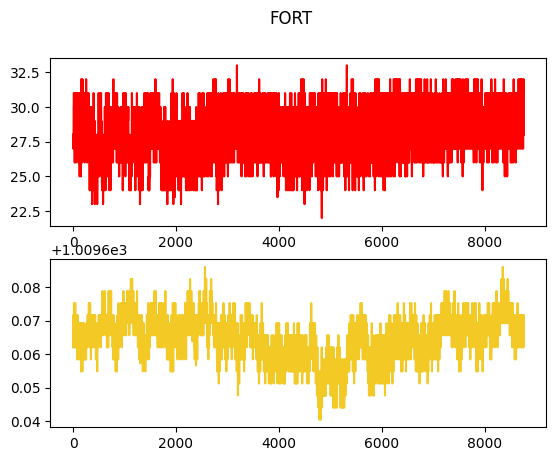

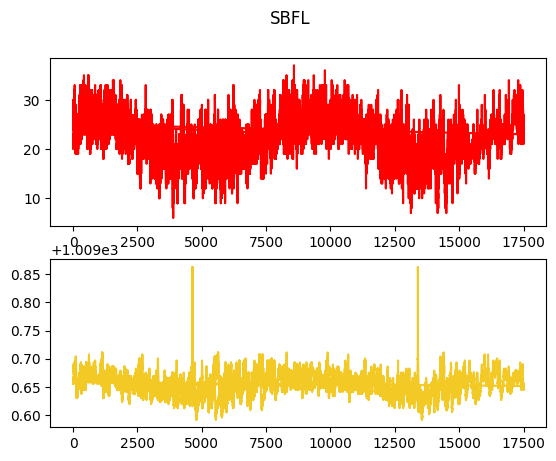

In [73]:
# Condicionando a leitura para apenas uma estação
for st in stations:
    dataAll = []
    print(st)
    for year in years:
        print(year)
        try:
            data = pd.read_csv(dataPath+'\\'+'metar_'+st+'_'+year+'.csv')
            dataAll.append(data)
        except:
            print('Não tem a estação ou o ano')
    
    # Concatenando a lista de dados
    dataAll = pd.concat(dataAll)

    # Criando a pasta das figuras
    os.makedirs(os.path.dirname(cwd) +'\\figuras\\'+st, exist_ok=True)
    
    # Criando uma figura para a estação
    fig, ax = plt.subplots(2)
    ax[0].plot(dataAll.temp,color='red')
    ax[1].plot(dataAll.p, color = '#f3c926')
    fig.suptitle(st)

    # Salvando as figuras
    fig.savefig(os.path.dirname(cwd) +'\\figuras\\'+st+'\\timeseries_'+st+'_'+years[0]+'to'+years[-1]+'.png')
    